# Linear Discriminant Analysis

### **Step 0: Import packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### **Step 1: Load data**

In [2]:
dataset = pd.read_csv('data/Wine.csv')
dataset.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
# print(x)
# print(y)

### **Step 2: Split data**

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

### **Step 3: Feature scaling**

In [7]:
scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)

In [8]:
# print(x_train)
# print(y_train)

### **Step 4: LDA**

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

### **Step 5: Fit model**

In [10]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

### **Step 6: Prediction & Visualization**

In [11]:
y_pred = logreg.predict(x_test)

In [12]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


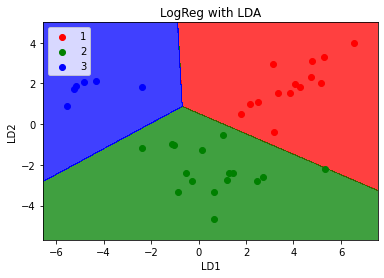

In [13]:
x1,x2 = np.meshgrid(np.arange(x_test[:,0].min()-1, x_test[:,0].max()+1, 0.01),
                    np.arange(x_test[:,1].min()-1, x_test[:,1].max()+1, 0.01))
y_pred_hq = logreg.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
# plot the predicted decision boundary
plt.contourf(x1,x2,y_pred_hq,alpha=0.75,cmap=ListedColormap(('red','green', 'blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
# plot data points with diff colors for diff classes
for i,j in enumerate(np.unique(y_test)): # enumerate adds indices to the list/array to make iteration more convenient
    plt.scatter(x_test[y_test==j,0],x_test[y_test==j,1],
                color=ListedColormap(('red','green', 'blue'))(i), label=j)
plt.title('LogReg with LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()